# Reflexer Model & Simulation

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.plotting.backend = "plotly"

import sys
sys.path.append('./models/v1')

from models.v1.run import run

In [3]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = [
    'https://spreadsheets.google.com/feeds',
    'https://www.googleapis.com/auth/drive'
]

credentials = ServiceAccountCredentials.from_json_keyfile_name('credentials/spreadsheet-credentials.json', scope) # Your json file here
gc = gspread.authorize(credentials)

test_spreadsheet = gc.open('debt-price-test-data')
# gc.list_spreadsheet_files()

ws_1 = test_spreadsheet.get_worksheet(0)

In [4]:
test_1 = ws_1.get_all_values()
headers_1 = test_1.pop(0)
types_1 = test_1.pop(0)

# debt_price_source_file = './test/data/debt_price_source_file'
# debt_price_dataframe = pd.read_csv(debt_price_source_file)
debt_price_dataframe = pd.DataFrame(test_1, columns=headers_1)
debt_price_dataframe.head()

timestamp seconds_passed    price_move
0  2020-09-07 11:31:58           5185  0.9993389888
1  2020-09-07 12:48:09           4571     1.0003479
2  2020-09-07 14:03:36           4527   0.998646148
3  2020-09-07 16:51:27          10071  0.9957287471
4  2020-09-07 18:29:18           5871  0.9954651836

In [5]:
SIMULATION_TIMESTEPS = range(debt_price_dataframe.shape[0])
SIMULATION_TIMESTEPS

range(0, 720)

In [6]:
from models.v1.config import Config
import models.v1.options as options 

# Update parameter options
debt_price_source = options.DebtPriceSource.EXTERNAL.value
update_params = {
    options.DebtPriceSource.__name__: [debt_price_source],
    options.IntegralType.__name__: [options.IntegralType.LEAKY.value],
}

env_processes = {}
if debt_price_source == options.DebtPriceSource.EXTERNAL.value:
    env_processes = {
        'seconds_passed': lambda state, _sweep, _value, df=debt_price_dataframe.copy(): int(df.iloc[state['timestep'] - 1]['seconds_passed']),
        'price_move': lambda state, _sweep, _value, df=debt_price_dataframe.copy(): float(df.iloc[state['timestep'] - 1]['price_move']),
    }

config = Config(M=update_params, T=SIMULATION_TIMESTEPS, env_processes=env_processes, merge_params=True)

In [7]:
data = run(clear_configs=True, config=config, drop_midsteps=True)

# compression_opts = dict(method='zip', archive_name='data.csv')  
# data.to_csv('data.zip', index=False, compression=compression_opts) 


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (720, 16, 1, 17)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 2.07s


In [8]:
df = data.copy()
df

index                error_star                 error_hat old_error_star  \
0        0                         0                         0              0   
1        6                         0   0.003247992334228530595              0   
2       12  -0.001170186930412856819   0.002523916415217836964              0   
3       18  -0.000817482091293836928   0.002213551700307726105              0   
4       24  -0.001119845926975730288   0.001094362277217359672              0   
..     ...                       ...                       ...            ...   
716   4296   0.000625635485017071734  -0.002627023746624065772              0   
717   4302   0.000924138332248188563  -0.003185810721420211457              0   
718   4308   0.001209046458229763240  -0.001936885539420006552              0   
719   4314   0.000969691508356032680  -0.002990396936715806249              0   
720   4320   0.001382874631105943791  -0.002257479899575944720              0   

    old_error_hat error_star_integral          error_hat_integral  \
0               0                   0                           0   
1               0                   0     5.846386201611355071944   
2               0                   0    20.810059634551062971330   
3               0                   0    31.637543012584737367985   
4               0                   0    39.125006300712768904706   
..            ...                 ...                         ...   
716             0                   0  1062.864227248637273204670   
717             0                   0  1051.148459378294032336641   
718             0                   0  1040.723772487484188574446   
719             0                   0  1030.208951683410364054025   
720             0                   0  1018.947007992728266471754   

        error_star_derivative      error_hat_derivative  \
0                           0                         0   
1                           0                         0   
2    -0.000000225686968257092  -0.000000225686968257092   
3     0.000000077161417440143   0.000000077161417440143   
4    -0.000000066791216187791  -0.000000066791216187791   
..                        ...                       ...   
716   0.000000024419133070642   0.000000024419133070642   
717   0.000000074051810278099   0.000000074051810278099   
718   0.000000070001996555662   0.000000070001996555662   
719  -0.000000056081290973261  -0.000000056081290973261   
720   0.000000096268201945455   0.000000096268201945455   

                  target_rate  ... timedelta                  timestamp  \
0                           0  ...         0 2020-09-07 20:24:54.236547   
1                           0  ...      3600 2020-09-07 21:24:54.236547   
2     0.000000081262981278655  ...      5185 2020-09-07 22:51:19.236547   
3     0.000000056769589673198  ...      4571 2020-09-08 00:07:30.236547   
4     0.000000077767078262202  ...      4527 2020-09-08 01:22:57.236547   
..                        ...  ...       ...                        ...   
716  -0.000000043446908681746  ...      5475 2020-10-17 13:51:28.236547   
717  -0.000000064176273072776  ...      4031 2020-10-17 14:58:39.236547   
718  -0.000000083961559599310  ...      4070 2020-10-17 16:06:29.236547   
719  -0.000000067339688080260  ...      4268 2020-10-17 17:17:37.236547   
720  -0.000000096032960493486  ...      4292 2020-10-17 18:29:09.236547   

    blockheight  seconds_passed price_move  simulation  subset  run  substep  \
0             0               0   1.000000           0       0    1        0   
1           240            5185   0.999339           0       0    1        6   
2           585            4571   1.000348           0       0    1        6   
3           889            4527   0.998646           0       0    1        6   
4          1190           10071   0.995729           0       0    1        6   
..          ...             ...        ...         ...     ...  ...      ...   
716      228497            4031  

In [9]:
FXcols = [
    'error_star',
    'error_hat',
    'old_error_star',
    'old_error_hat',
    'error_star_integral',
    'error_hat_integral',
    'error_star_derivative',
    'error_hat_derivative',
    'target_rate',
    'target_price',
    'market_price',
    'debt_price'
]

In [10]:
for c in FXcols:
    print(c)
    df[c] = df[c].apply(lambda x: float(x))

error_star
error_hat
old_error_star
old_error_hat
error_star_integral
error_hat_integral
error_star_derivative
error_hat_derivative
target_rate
target_price
market_price
debt_price


In [11]:
df['target_rate_hourly'] = df.target_rate * 3600
df['error_star_derivative_scaled'] = df.error_star_derivative * 3600
df['error_hat_derivative_scaled'] = df.error_star_derivative * 3600

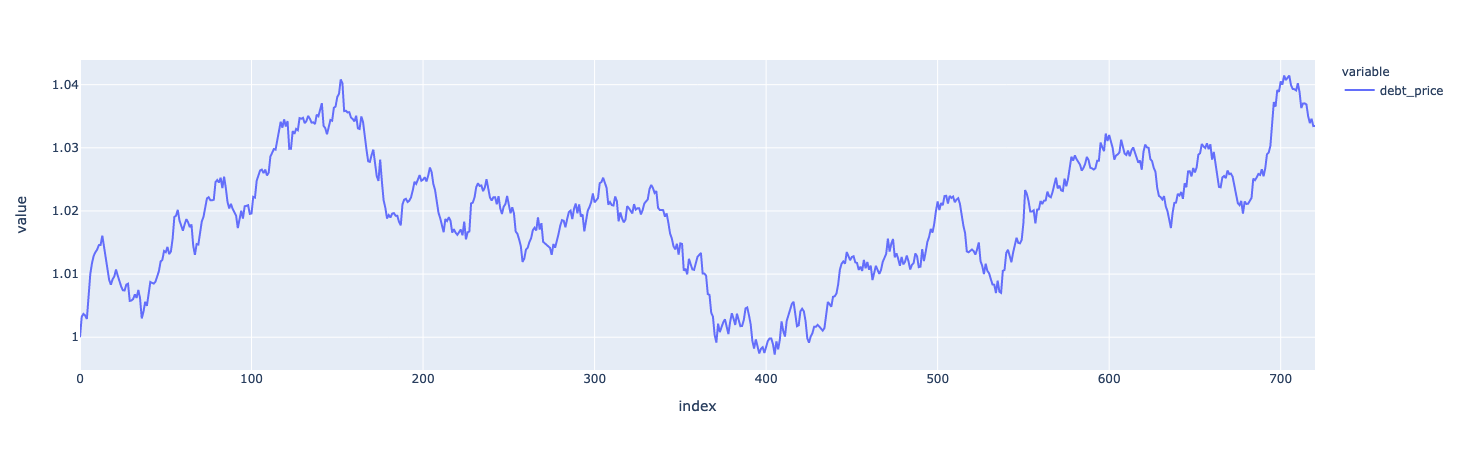

In [12]:
df.debt_price.plot()

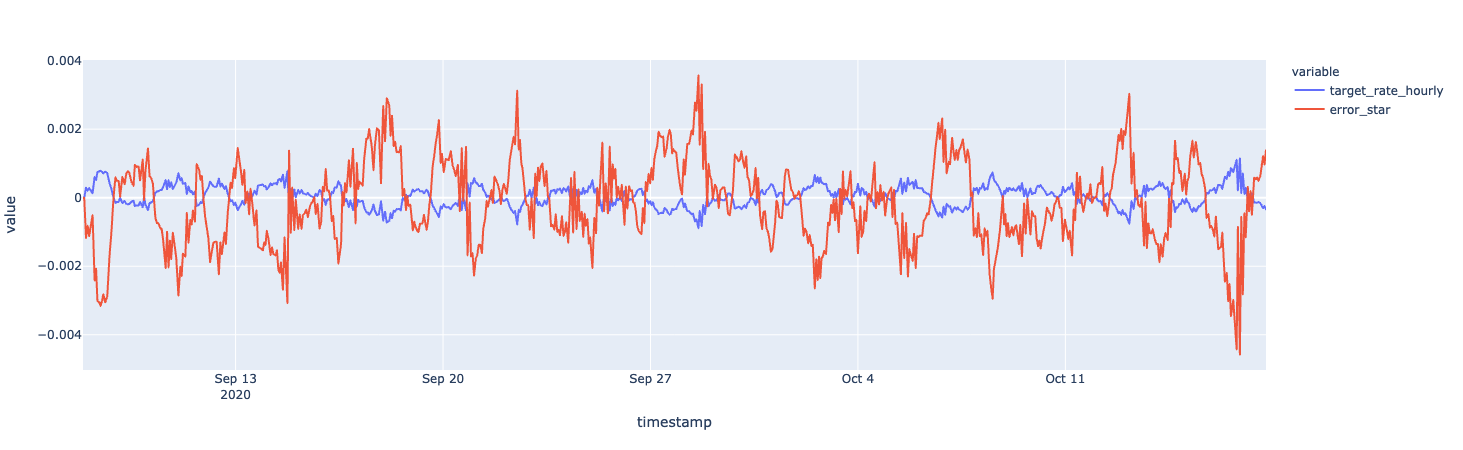

In [13]:
df.plot(kind='line', x='timestamp', y=['target_rate_hourly', 'error_star'])

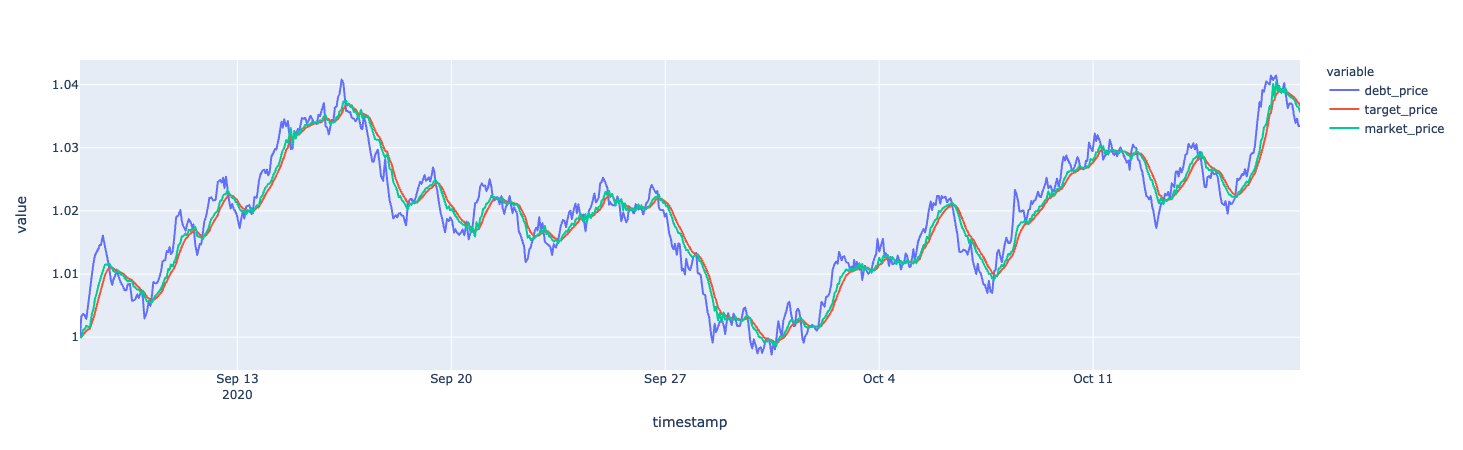

In [14]:
df.plot(kind='line', x='timestamp', y=['debt_price', 'target_price', 'market_price'])

In [15]:
def integral_plot(df):
    from matplotlib.patches import Rectangle

    df['seconds'] = df.timedelta.cumsum()

    x=df.seconds.values
    y=df.error_star.values
    h=(df.error_star.shift(periods=-1)+df.error_star)/2
    w=df.timedelta.values

    plt.figure(figsize=(18, 12))
    plt.plot(x,y , marker='.',linestyle='--', color='r')

    ax = plt.gca()

    for p in range(len(x)-1):
        ax.add_patch(
            Rectangle(
            (x[p], 0),
            w[p+1],
            h[p+1],
            edgecolor = 'blue',
            facecolor = 'cyan',
            fill=True
        ))

    plt.title('Visualizing Numerical Integration')
    plt.xlabel('Time passed in seconds')
    plt.ylabel('Observed Error')

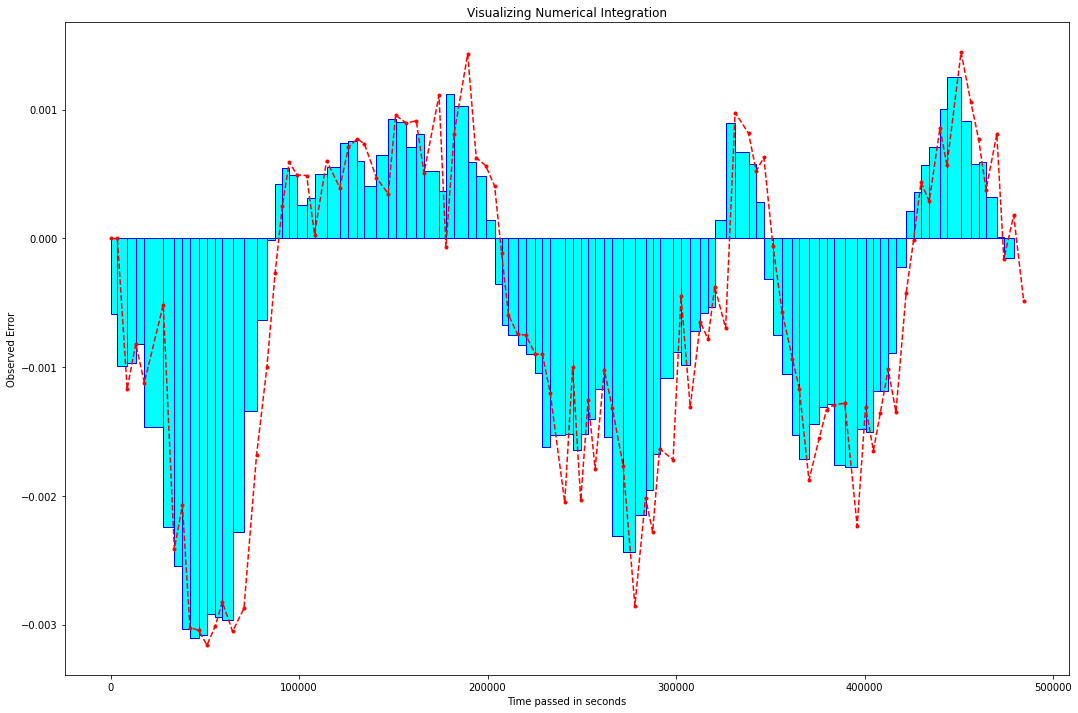

In [16]:
integral_plot(df[df.timestep<100])

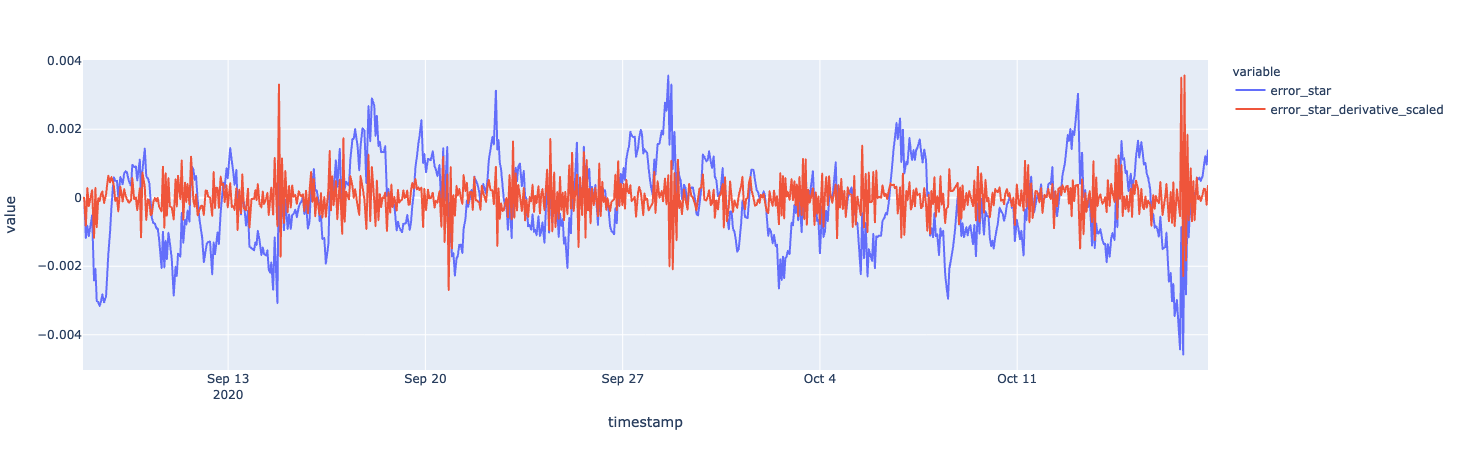

In [17]:
df.plot(kind='line', x='timestamp', y=['error_star','error_star_derivative_scaled'])

Plotly `hist()` error, see: https://github.com/plotly/plotly.py/pull/2713

In [18]:
df.timedelta.apply(lambda x: x/3600).hist()

TypeError: histogram() got an unexpected keyword argument 'legend'

In [ ]:
df.error_star.hist()

In [ ]:
import seaborn as sns; sns.set(style="white", color_codes=True)

In [ ]:
g = sns.jointplot(x="error_hat", y="error_star", alpha=.3, data=df)